# DD2424 Deep Learning in Data Science
## Assignment 3

### Imports

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install tqdm

In [2]:
import numpy as np
from data import *
from utils import *
from model import Model
from layers.activations import ReLU, Softmax
from layers.dense import Dense
from layers.batchnormalization import BatchNormalization
from layers.dropout import Dropout

### Load data

In [3]:
X_train, Y_train, y = load_data('data_batch_1')
X_mean = np.mean(X_train, axis=1).reshape(X_train.shape[0], 1)
X_std = np.std(X_train, axis=1).reshape(X_train.shape[0], 1)
X_train = normalize(X_train, X_mean, X_std)

assert np.allclose(np.mean(X_train, axis=1).reshape(X_train.shape[0], 1), np.zeros((X_train.shape[0], 1))), \
    "Check normalization, mean should be 0 "
assert np.allclose(np.std(X_train, axis=1).reshape(X_train.shape[0], 1), np.ones((X_train.shape[0], 1))), \
    "Check normalization, std should be 1"

X_val, Y_val, _ = load_data('data_batch_2')
X_test, Y_test, _ = load_data('test_batch')
X_val = normalize(X_val, X_mean, X_std)
X_test = normalize(X_test, X_mean, X_std)

BATCH_SIZE = 20
batch = X_train[:, :BATCH_SIZE], Y_train[:, :BATCH_SIZE]

In [4]:
X_train.shape

(3072, 10000)

## Exercise 1
Upgrade assignment 2 code to train & test k-layer networks

#### Two-layer network
Checking the gradients

In [5]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

In [6]:
gradients, _ = classifier.compute_gradients(*batch, 0)
gradients = list(reversed(gradients))

In [7]:
kernel_gradients_num, bias_gradients_num, _, _ = classifier.compute_gradients_num(*batch, 0)

In [8]:
equal = True
threshold = 0

for i, (grad_kernel, grad_bias) in enumerate(gradients):
    grad_kernel_num = kernel_gradients_num[i]
    grad_bias_num = bias_gradients_num[i]
    
    equal = equal and np.allclose(grad_kernel[:10, :], grad_kernel_num[:10, :], rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_bias, grad_bias_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_kernel[:10, :] - grad_kernel_num[:10, :])))
    threshold = max(threshold, np.max(np.abs(grad_bias - grad_bias_num)))

print(equal)
print(threshold)

True
1.7361976439866922e-10


#### Three-layer network
Checking the gradients

In [9]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

In [10]:
gradients, _ = classifier.compute_gradients(*batch, 0)
gradients = list(reversed(gradients))

In [11]:
kernel_gradients_num, bias_gradients_num, _, _ = classifier.compute_gradients_num(*batch, 0)

In [12]:
equal = True
threshold = 0

for i, (grad_kernel, grad_bias) in enumerate(gradients):
    grad_kernel_num = kernel_gradients_num[i]
    grad_bias_num = bias_gradients_num[i]
    
    equal = equal and np.allclose(grad_kernel[:10, :], grad_kernel_num[:10, :], rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_bias, grad_bias_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_kernel[:10, :] - grad_kernel_num[:10, :])))
    threshold = max(threshold, np.max(np.abs(grad_bias - grad_bias_num)))

print(equal)
print(threshold)

True
2.0169355074983741e-10


#### Four-layer network
Checking the gradients

In [13]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(ReLU())
classifier.add(Dense(50, 30))
classifier.add(ReLU())
classifier.add(Dense(30, 10))
classifier.add(Softmax())

In [14]:
gradients, _ = classifier.compute_gradients(*batch, 0)
gradients = list(reversed(gradients))

In [15]:
kernel_gradients_num, bias_gradients_num, _, _ = classifier.compute_gradients_num(*batch, 0)

In [16]:
equal = True
threshold = 0

for i, (grad_kernel, grad_bias) in enumerate(gradients):
    grad_kernel_num = kernel_gradients_num[i]
    grad_bias_num = bias_gradients_num[i]
    
    equal = equal and np.allclose(grad_kernel[:10, :], grad_kernel_num[:10, :], rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_bias, grad_bias_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_kernel[:10, :] - grad_kernel_num[:10, :])))
    threshold = max(threshold, np.max(np.abs(grad_bias - grad_bias_num)))

print(equal)
print(threshold)

True
1.491513856866078e-10


## Exercise 2
Can I train multi-layer networks?

#### Two-layer network
Replicate assignment 2 results (~46.66%)

In [17]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

In [18]:
ns = 500
k = 3

loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, k=k, ns=ns, reg_lambda=0.01)

classifier.accuracy(X_test, Y_test)

100%|██████████| 30/30 [00:50<00:00,  1.69s/it]


0.4706

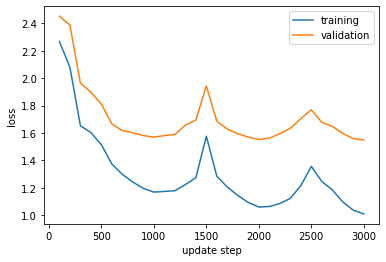

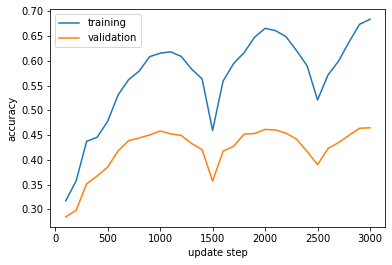

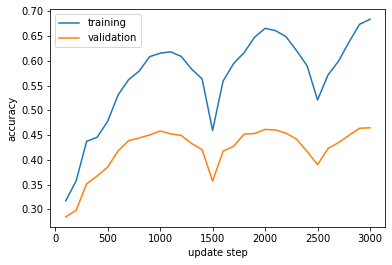

In [19]:
steps = 2 * ns * k

train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

train_validation_error(*loss, label='loss', steps=steps, save='two-layer-basic')
train_validation_error(*accuracy, label='accuracy', steps=steps, save='two-layer-basic')

#### Three-layer network

In [20]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

Load all the data for better results

In [21]:
X_train, Y_train, y = load_all_data()
X_mean = np.mean(X_train, axis=1).reshape(X_train.shape[0], 1)
X_std = np.std(X_train, axis=1).reshape(X_train.shape[0], 1)
X_train = normalize(X_train, X_mean, X_std)

assert np.allclose(np.mean(X_train, axis=1).reshape(X_train.shape[0], 1), np.zeros((X_train.shape[0], 1))), \
    "Check normalization, mean should be 0 "
assert np.allclose(np.std(X_train, axis=1).reshape(X_train.shape[0], 1), np.ones((X_train.shape[0], 1))), \
    "Check normalization, std should be 1"

X_val, Y_val, _ = load_all_data(validation=True)
X_test, Y_test, _ = load_data('test_batch')
X_val = normalize(X_val, X_mean, X_std)
X_test = normalize(X_test, X_mean, X_std)

Suggested hyperparameters

In [22]:
n_batch = 100
eta_min = 1e-5
eta_max = 1e-1
lambda_ = 0.005
k = 2
ns = int(5 * 45_000 / n_batch)

In [23]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [02:14<00:00,  7.47s/it]


0.5271

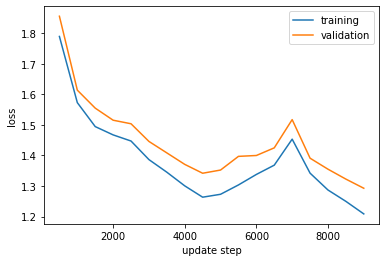

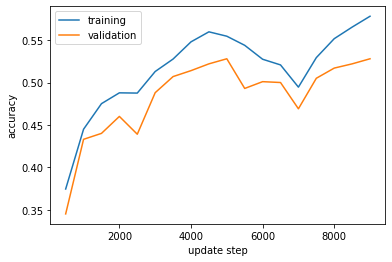

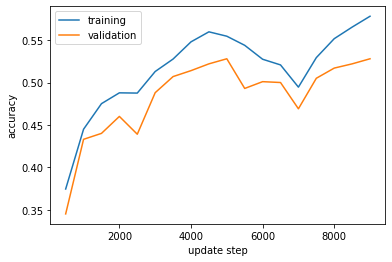

In [24]:
steps = 2 * ns * k

train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

train_validation_error(*loss, label='loss', steps=steps, save='three-layer-basic')
train_validation_error(*accuracy, label='accuracy', steps=steps, save='three-layer-basic')

#### Nine-layer network

In [25]:
classifier = Model()
# Layer 1
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
# Layer 2
classifier.add(Dense(50, 30))
classifier.add(ReLU())
# Layer 3
classifier.add(Dense(30, 20))
classifier.add(ReLU())
# Layer 4
classifier.add(Dense(20, 20))
classifier.add(ReLU())
# Layer 5
classifier.add(Dense(20, 10))
classifier.add(ReLU())
# Layer 6
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 7
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 8
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 9
classifier.add(Dense(10, 10))
classifier.add(Softmax())

In [26]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [03:05<00:00, 10.33s/it]


0.4659

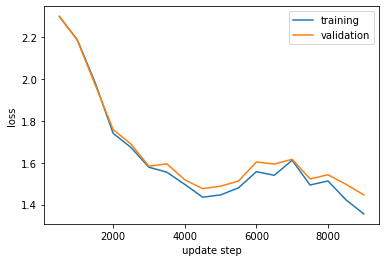

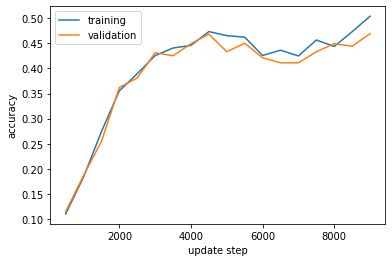

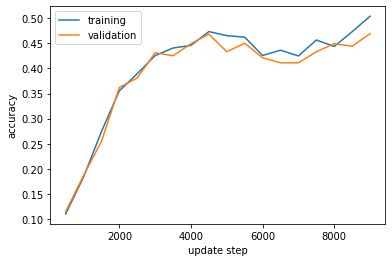

In [27]:
steps = 2 * ns * k

train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

train_validation_error(*loss, label='loss', steps=steps, save='nine-layer-basic')
train_validation_error(*accuracy, label='accuracy', steps=steps, save='nine-layer-basic')

## Exercise 3
Implement batch normalization

#### Three-layer network

In [28]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

Checking the gradients

In [29]:
dense_gradients, batch_gradients = classifier.compute_gradients(*batch, 0)
dense_gradients = list(reversed(dense_gradients))
batch_gradients = list(reversed(batch_gradients))

In [30]:
kernel_gradients_num, bias_gradients_num, gamma_gradients_num, beta_gradients_num = classifier.compute_gradients_num(*batch, 0)

In [31]:
equal = True
threshold = 0

for i, (grad_kernel, grad_bias) in enumerate(dense_gradients):
    grad_kernel_num = kernel_gradients_num[i]
    grad_bias_num = bias_gradients_num[i]
    
    equal = equal and np.allclose(grad_kernel[:10, :], grad_kernel_num[:10, :], rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_bias, grad_bias_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_kernel[:10, :] - grad_kernel_num[:10, :])))
    threshold = max(threshold, np.max(np.abs(grad_bias - grad_bias_num)))
    
for i, (grad_gamma, grad_beta) in enumerate(batch_gradients):
    grad_gamma_num = gamma_gradients_num[i]
    grad_beta_num = beta_gradients_num[i]
    
    equal = equal and np.allclose(grad_gamma, grad_gamma_num, rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_beta, grad_beta_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_gamma - grad_gamma_num)))
    threshold = max(threshold, np.max(np.abs(grad_beta - grad_beta_num)))

print(equal)
print(threshold)

True
1.0758189478154989e-10


Train the network

In [32]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [02:32<00:00,  8.49s/it]


0.5316

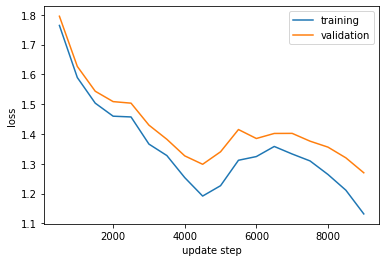

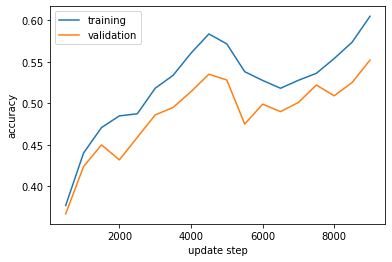

In [33]:
steps = 2 * ns * k
train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

##### Tuning lambda
Coarse search

In [34]:
reg_lambda = [10 ** l for l in np.linspace(-5, -1, 5)]

for i in reg_lambda:
    classifier.initialize_weights()
    classifier.fit(X_train, Y_train, k=k, ns=ns, reg_lambda=i)
    print(f"Validation accuracy for regularization lambda={i}: {classifier.accuracy(X_val, Y_val)*100}%")

  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=1e-05: 50.1%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.0001: 50.7%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.001: 52.5%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.01: 53.800000000000004%


100%|██████████| 18/18 [01:35<00:00,  5.28s/it]

Validation accuracy for regularization lambda=0.1: 46.300000000000004%


Fine search

In [35]:
reg_lambda = [10 ** l for l in np.linspace(-3, -1.5, 10)]

for i in reg_lambda:
    classifier.initialize_weights()
    classifier.fit(X_train, Y_train, k=k, ns=ns, reg_lambda=i)
    print(f"Validation accuracy for regularization lambda={i}: {classifier.accuracy(X_val, Y_val)*100}%")
    print(f"Test accuracy for regularization lambda={i}: {classifier.accuracy(X_test, Y_test)*100}%")

100%|██████████| 18/18 [01:35<00:00,  5.29s/it]


Validation accuracy for regularization lambda=0.001: 52.5%


  0%|          | 0/18 [00:00<?, ?it/s]

Test accuracy for regularization lambda=0.001: 52.87%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.0014677992676220691: 53.1%
Test accuracy for regularization lambda=0.0014677992676220691: 52.83%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.0021544346900318843: 54.2%
Test accuracy for regularization lambda=0.0021544346900318843: 53.02%


100%|██████████| 18/18 [01:33<00:00,  5.22s/it]


Validation accuracy for regularization lambda=0.0031622776601683794: 52.900000000000006%
Test accuracy for regularization lambda=0.0031622776601683794: 53.510000000000005%


100%|██████████| 18/18 [01:34<00:00,  5.26s/it]


Validation accuracy for regularization lambda=0.004641588833612777: 53.1%
Test accuracy for regularization lambda=0.004641588833612777: 53.92%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.006812920690579608: 52.900000000000006%
Test accuracy for regularization lambda=0.006812920690579608: 52.93%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.01: 53.800000000000004%
Test accuracy for regularization lambda=0.01: 52.949999999999996%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.01467799267622069: 51.300000000000004%
Test accuracy for regularization lambda=0.01467799267622069: 51.82%


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for regularization lambda=0.021544346900318832: 51.7%
Test accuracy for regularization lambda=0.021544346900318832: 50.970000000000006%


100%|██████████| 18/18 [01:37<00:00,  5.41s/it]


Validation accuracy for regularization lambda=0.03162277660168379: 49.5%
Test accuracy for regularization lambda=0.03162277660168379: 50.12%


#### Nine-layer network

In [36]:
classifier = Model()
# Layer 1
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
# Layer 2
classifier.add(Dense(50, 30))
classifier.add(BatchNormalization(30))
classifier.add(ReLU())
# Layer 3
classifier.add(Dense(30, 20))
classifier.add(BatchNormalization(20))
classifier.add(ReLU())
# Layer 4
classifier.add(Dense(20, 20))
classifier.add(BatchNormalization(20))
classifier.add(ReLU())
# Layer 5
classifier.add(Dense(20, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 6
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 7
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 8
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 9
classifier.add(Dense(10, 10))
classifier.add(Softmax())

In [37]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:55<00:00,  6.39s/it]


0.5158

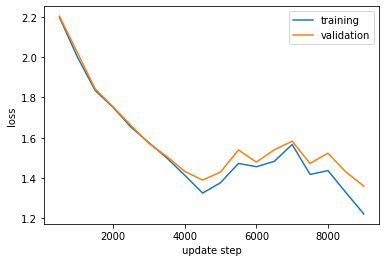

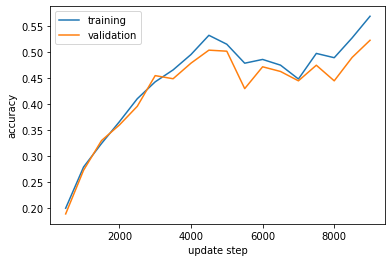

In [38]:
steps = 2 * ns * k
train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

## Plots

##### Three-layer network
Include graphs of the evolution of the loss function when you train the 3-layer network with and without batch normalization with the given default parameter setting.

In [39]:
n_batch = 100
eta_min = 1e-5
eta_max = 1e-1
lambda_ = 0.005
k = 2
ns = int(5 * 45_000 / n_batch)

In [40]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

In [41]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:27<00:00,  4.89s/it]


0.5271

In [42]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

In [43]:
bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:34<00:00,  5.27s/it]


0.5316

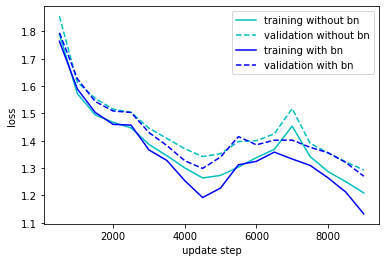

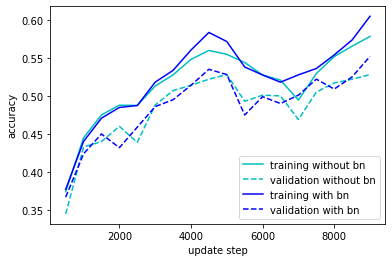

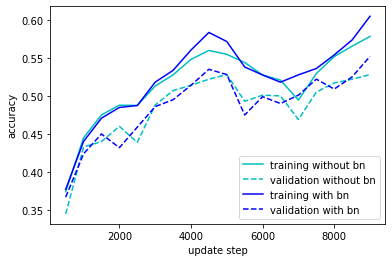

In [44]:
steps = 2 * ns * k
compare_batch_plot(*loss, *bn_loss, label='loss', steps=steps)
compare_batch_plot(*accuracy, *bn_accuracy, label='accuracy', steps=steps)

compare_batch_plot(*loss, *bn_loss, label='loss', steps=steps, save='three-layer-comparison')
compare_batch_plot(*accuracy, *bn_accuracy, label='accuracy', steps=steps, save='three-layer-comparison')

##### Nine-layer network
Include graphs of the evolution of the loss function when you train the 3-layer network with and without batch normalization with the given default parameter setting.

In [45]:
classifier = Model()
# Layer 1
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
# Layer 2
classifier.add(Dense(50, 30))
classifier.add(ReLU())
# Layer 3
classifier.add(Dense(30, 20))
classifier.add(ReLU())
# Layer 4
classifier.add(Dense(20, 20))
classifier.add(ReLU())
# Layer 5
classifier.add(Dense(20, 10))
classifier.add(ReLU())
# Layer 6
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 7
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 8
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 9
classifier.add(Dense(10, 10))
classifier.add(Softmax())

In [46]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:26<00:00,  4.78s/it]


0.4659

In [47]:
classifier = Model()
# Layer 1
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
# Layer 2
classifier.add(Dense(50, 30))
classifier.add(BatchNormalization(30))
classifier.add(ReLU())
# Layer 3
classifier.add(Dense(30, 20))
classifier.add(BatchNormalization(20))
classifier.add(ReLU())
# Layer 4
classifier.add(Dense(20, 20))
classifier.add(BatchNormalization(20))
classifier.add(ReLU())
# Layer 5
classifier.add(Dense(20, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 6
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 7
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 8
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 9
classifier.add(Dense(10, 10))
classifier.add(Softmax())

In [48]:
bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:54<00:00,  6.35s/it]


0.5158

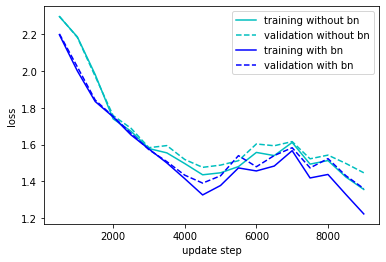

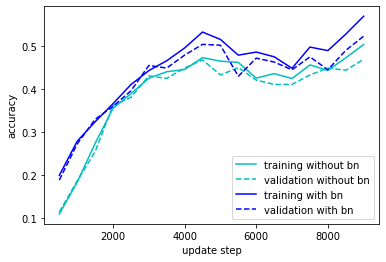

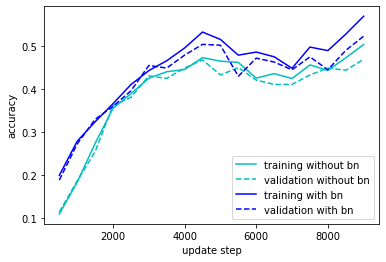

In [49]:
steps = 2 * ns * k
compare_batch_plot(*loss, *bn_loss, label='loss', steps=steps)
compare_batch_plot(*accuracy, *bn_accuracy, label='accuracy', steps=steps)

compare_batch_plot(*loss, *bn_loss, label='loss', steps=steps, save='nine-layer-comparison')
compare_batch_plot(*accuracy, *bn_accuracy, label='accuracy', steps=steps, save='nine-layer-comparison')

## Initialization

  0%|          | 0/18 [00:00<?, ?it/s]

Test accuracy for initialization sigma 0.1, without batch normalization:0.5275


100%|██████████| 18/18 [01:34<00:00,  5.24s/it]


Test accuracy for initialization sigma 0.1, batch normalization:0.536


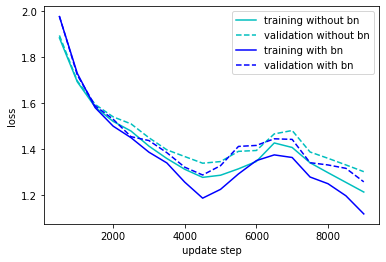

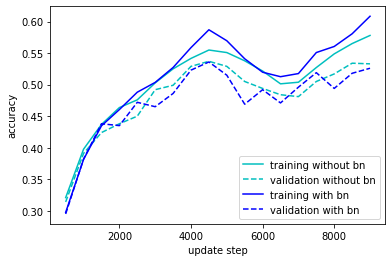

  0%|          | 0/18 [00:00<?, ?it/s]

Test accuracy for initialization sigma 0.001, without batch normalization:0.4794


100%|██████████| 18/18 [01:37<00:00,  5.39s/it]


Test accuracy for initialization sigma 0.001, batch normalization:0.5348


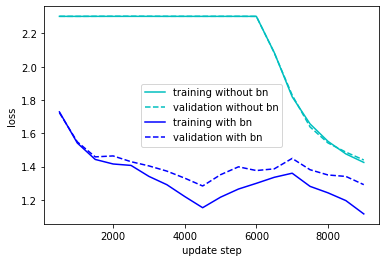

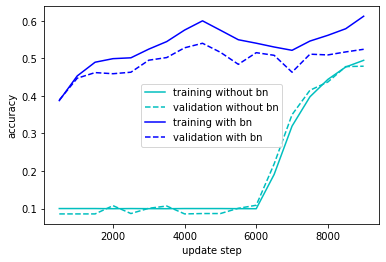

  0%|          | 0/18 [00:00<?, ?it/s]

Test accuracy for initialization sigma 0.0001, without batch normalization:0.1


100%|██████████| 18/18 [01:34<00:00,  5.23s/it]


Test accuracy for initialization sigma 0.0001, batch normalization:0.53


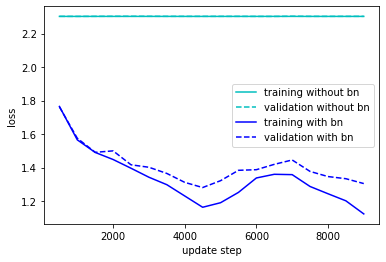

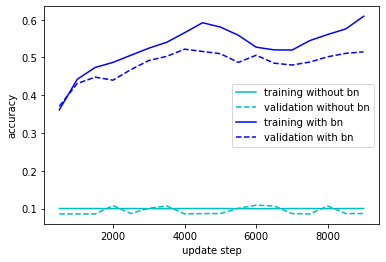

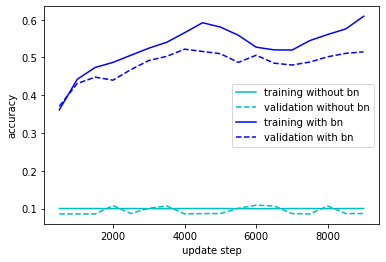

In [50]:
sigma_list = [1e-1, 1e-3, 1e-4]

for sigma in sigma_list:
    classifier = Model()
    classifier.add(Dense(X_train.shape[0], 50, initialization="normal", initialization_sigma=sigma))
    classifier.add(ReLU())
    classifier.add(Dense(50, 50, initialization="normal", initialization_sigma=sigma))
    classifier.add(ReLU())
    classifier.add(Dense(50, 10, initialization="normal", initialization_sigma=sigma))
    classifier.add(Softmax())
    
    loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
    print(f"Test accuracy for initialization sigma {sigma}, without batch normalization:"
          f"{classifier.accuracy(X_test, Y_test)}")
    
    classifier = Model()
    classifier.add(Dense(X_train.shape[0], 50, initialization="normal", initialization_sigma=sigma))
    classifier.add(BatchNormalization(50))
    classifier.add(ReLU())
    classifier.add(Dense(50, 50, initialization="normal", initialization_sigma=sigma))
    classifier.add(BatchNormalization(50))
    classifier.add(ReLU())
    classifier.add(Dense(50, 10, initialization="normal", initialization_sigma=sigma))
    classifier.add(Softmax())
    
    bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
    print(f"Test accuracy for initialization sigma {sigma}, batch normalization:"
          f"{classifier.accuracy(X_test, Y_test)}")
    
    steps = 2 * ns * k
    compare_batch_plot(*loss, *bn_loss, label='loss', steps=steps)
    compare_batch_plot(*accuracy, *bn_accuracy, label='accuracy', steps=steps)

    compare_batch_plot(*loss, *bn_loss, label='loss', steps=steps, save=f'sigma-{sigma}'.replace('.', '_'))
    compare_batch_plot(*accuracy, *bn_accuracy, label='accuracy', steps=steps, save=f'sigma-{sigma}'.replace('.', '_'))

## Bonus

In [51]:
n_batch = 100
eta_min = 1e-5
eta_max = 1e-1
lambda_ = 0.005
k = 2
ns = int(5 * 45_000 / n_batch)

### Network architecture
Ideally, we would perform a grid search; due to lack of resources, let's first explore the depth of the network and then the number of nodes.

##### Number of layers
Let's first explore different number of layers with similar node structure.

In [52]:
architectures = [[50, 10],                                # 2-layer
                 [50, 50, 10],                            # 3-layer
                 [50, 40, 20, 10],                        # 4-layer
                 [50, 30, 20, 20, 10],                    # 5-layer
                 [50, 30, 20, 20, 10, 10],                # 6-layer
                 [50, 30, 20, 20, 10, 10, 10],            # 7-layer
                 [50, 30, 30, 20, 10, 10, 10, 10],        # 8-layer
                 [50, 30, 30, 20, 10, 10, 10, 10, 10]]    # 9-layer

for layers in architectures:
    classifier = Model()

    for i in range(len(layers) - 1):
        classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
        classifier.add(BatchNormalization(layers[i]))
        classifier.add(ReLU())

    classifier.add(Dense(layers[-2], layers[-1]))
    classifier.add(Softmax())

    bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
    
    print(f"Validation accuracy for a {len(layers)}-layer network, in the form of {layers}: "
          f"{classifier.accuracy(X_val, Y_val)}")
    print(f"Test accuracy for a {len(layers)}-layer network, in the form of {layers}: "
          f"{classifier.accuracy(X_test, Y_test)}")

  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 2-layer network, in the form of [50, 10]: 0.527
Test accuracy for a 2-layer network, in the form of [50, 10]: 0.5152


100%|██████████| 18/18 [01:42<00:00,  5.67s/it]


Validation accuracy for a 3-layer network, in the form of [50, 50, 10]: 0.552


  0%|          | 0/18 [00:00<?, ?it/s]

Test accuracy for a 3-layer network, in the form of [50, 50, 10]: 0.5316


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 4-layer network, in the form of [50, 40, 20, 10]: 0.545
Test accuracy for a 4-layer network, in the form of [50, 40, 20, 10]: 0.5377


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 5-layer network, in the form of [50, 30, 20, 20, 10]: 0.535
Test accuracy for a 5-layer network, in the form of [50, 30, 20, 20, 10]: 0.5295


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 6-layer network, in the form of [50, 30, 20, 20, 10, 10]: 0.523
Test accuracy for a 6-layer network, in the form of [50, 30, 20, 20, 10, 10]: 0.5226


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 7-layer network, in the form of [50, 30, 20, 20, 10, 10, 10]: 0.515
Test accuracy for a 7-layer network, in the form of [50, 30, 20, 20, 10, 10, 10]: 0.5215


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 8-layer network, in the form of [50, 30, 30, 20, 10, 10, 10, 10]: 0.517
Test accuracy for a 8-layer network, in the form of [50, 30, 30, 20, 10, 10, 10, 10]: 0.522


100%|██████████| 18/18 [01:54<00:00,  6.37s/it]


Validation accuracy for a 9-layer network, in the form of [50, 30, 30, 20, 10, 10, 10, 10, 10]: 0.504
Test accuracy for a 9-layer network, in the form of [50, 30, 30, 20, 10, 10, 10, 10, 10]: 0.5138


##### Number of nodes
Let's now try different node configurations.

In [53]:
architectures = [[100,  50,  30, 10],                        # 314000 weights, 190 nodes -- 55.23% accuracy
                 [ 50,  40,  20, 10],                        # 156600 weights, 120 nodes -- 53.77% accuracy
                 [ 50,  50,  50, 10],                        # 159100 weights, 160 nodes -- 53.78% accuracy
                 [100, 100,  10, 10],                        # 318300 weights, 220 nodes -- 55.06% accuracy
                 [ 30,  50, 100, 10],                        #  99660 weights, 190 nodes -- 52.31% accuracy
                 [ 10, 100,  50, 10],                        #  37220 weights, 170 nodes -- 47.80% accuracy
                 [ 50, 150,  50, 10]]                        # 169100 weights, 260 nodes -- 55.00% accuracy


for layers in architectures:
    classifier = Model()

    for i in range(len(layers) - 1):
        classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
        classifier.add(BatchNormalization(layers[i]))
        classifier.add(ReLU())

    classifier.add(Dense(layers[-2], layers[-1]))
    classifier.add(Softmax())

    bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

    print(f"Validation accuracy for a {len(layers)}-layer network, in the form of {layers}: "
          f"{classifier.accuracy(X_val, Y_val)}")
    print(f"Test accuracy for a {len(layers)}-layer network, in the form of {layers}: "
          f"{classifier.accuracy(X_test, Y_test)}")

  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 4-layer network, in the form of [100, 50, 30, 10]: 0.556
Test accuracy for a 4-layer network, in the form of [100, 50, 30, 10]: 0.5523


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 4-layer network, in the form of [50, 40, 20, 10]: 0.545
Test accuracy for a 4-layer network, in the form of [50, 40, 20, 10]: 0.5377


100%|██████████| 18/18 [01:44<00:00,  5.78s/it]


Validation accuracy for a 4-layer network, in the form of [50, 50, 50, 10]: 0.54


  0%|          | 0/18 [00:00<?, ?it/s]

Test accuracy for a 4-layer network, in the form of [50, 50, 50, 10]: 0.5378


100%|██████████| 18/18 [02:24<00:00,  8.01s/it]


Validation accuracy for a 4-layer network, in the form of [100, 100, 10, 10]: 0.566
Test accuracy for a 4-layer network, in the form of [100, 100, 10, 10]: 0.5506


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 4-layer network, in the form of [30, 50, 100, 10]: 0.513
Test accuracy for a 4-layer network, in the form of [30, 50, 100, 10]: 0.5231


  0%|          | 0/18 [00:00<?, ?it/s]

Validation accuracy for a 4-layer network, in the form of [10, 100, 50, 10]: 0.49
Test accuracy for a 4-layer network, in the form of [10, 100, 50, 10]: 0.478


100%|██████████| 18/18 [02:31<00:00,  8.44s/it]


Validation accuracy for a 4-layer network, in the form of [50, 150, 50, 10]: 0.563
Test accuracy for a 4-layer network, in the form of [50, 150, 50, 10]: 0.55


### Apply activation before BN

##### Three-layer network

In [54]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:35<00:00,  5.33s/it]


0.5316

In [55]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(BatchNormalization(50))
classifier.add(Dense(50, 50))
classifier.add(ReLU())
classifier.add(BatchNormalization(50))
classifier.add(Dense(50, 10))
classifier.add(Softmax())

bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:35<00:00,  5.32s/it]


0.5296

##### Nine-layer network

In [56]:
layers = [50, 30, 20, 20, 10, 10, 10, 10, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(BatchNormalization(layers[i]))
    classifier.add(ReLU())
    
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:56<00:00,  6.47s/it]


0.5158

In [57]:
layers = [50, 30, 20, 20, 10, 10, 10, 10, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(ReLU())
    classifier.add(BatchNormalization(layers[i]))
    
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:53<00:00,  6.29s/it]


0.5199

##### Best network

In [58]:
layers = [100,  50,  30, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(BatchNormalization(layers[i]))
    classifier.add(ReLU())
    
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [02:40<00:00,  8.93s/it]


0.5523

In [59]:
layers = [100,  50,  30, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(ReLU())
    classifier.add(BatchNormalization(layers[i]))
    
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [02:42<00:00,  9.00s/it]


0.5475

### Dropout

##### Three-layer network

In [60]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [01:36<00:00,  5.39s/it]


0.5316

In [61]:
classifier = Model()
classifier.add(Dropout(0.5))
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dropout(0.5))
classifier.add(Dense(50, 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dropout(0.5))
classifier.add(Dense(50, 10))
classifier.add(Softmax())

dropout_loss, dropout_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [03:26<00:00, 11.45s/it]


0.4375

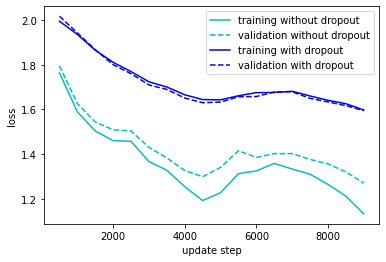

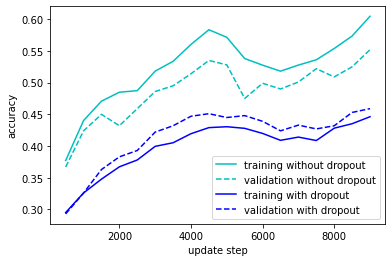

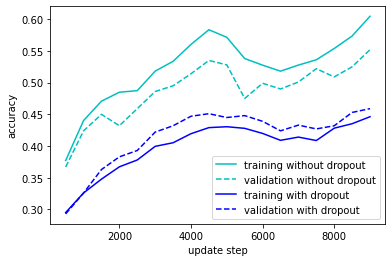

In [62]:
steps = 2 * ns * k
compare_batch_plot(*loss, *dropout_loss, label='loss', steps=steps, comparing_label='dropout')
compare_batch_plot(*accuracy, *dropout_accuracy, label='accuracy', steps=steps, comparing_label='dropout')

compare_batch_plot(*loss, *dropout_loss, label='loss', steps=steps, 
                   comparing_label='dropout', save='three-layer-dropout')
compare_batch_plot(*accuracy, *dropout_accuracy, label='accuracy', steps=steps, 
                   comparing_label='dropout', save='three-layer-dropout')

In [63]:
classifier = Model()
classifier.add(Dropout(0.5))
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dropout(0.5))
classifier.add(Dense(50, 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dropout(0.5))
classifier.add(Dense(50, 10))
classifier.add(Softmax())

dropout_loss, dropout_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=3*k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 55/55 [10:32<00:00, 11.49s/it]


0.4441

##### Best network

In [64]:
layers = [100,  50,  30, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(BatchNormalization(layers[i]))
    classifier.add(ReLU())
    
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [02:41<00:00,  8.96s/it]


0.5523

In [65]:
layers = [100,  50,  30, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dropout(0.5))
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(BatchNormalization(layers[i]))
    classifier.add(ReLU())
    
classifier.add(Dropout(0.5))
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

dropout_loss, dropout_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [04:36<00:00, 15.34s/it]


0.4318

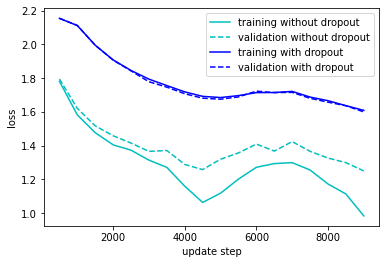

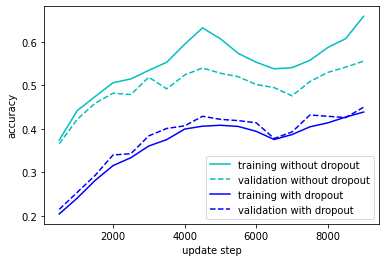

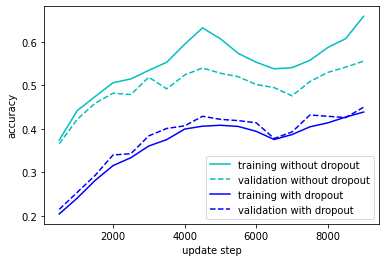

In [66]:
steps = 2 * ns * k
compare_batch_plot(*loss, *dropout_loss, label='loss', steps=steps, comparing_label='dropout')
compare_batch_plot(*accuracy, *dropout_accuracy, label='accuracy', steps=steps, comparing_label='dropout')

compare_batch_plot(*loss, *dropout_loss, label='loss', steps=steps, 
                   comparing_label='dropout', save='four-layer-dropout')
compare_batch_plot(*accuracy, *dropout_accuracy, label='accuracy', steps=steps, 
                   comparing_label='dropout', save='four-layer-dropout')

In [67]:
layers = [100,  50,  30, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dropout(0.5))
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(BatchNormalization(layers[i]))
    classifier.add(ReLU())
    
classifier.add(Dropout(0.5))
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

dropout_loss, dropout_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=3*k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 55/55 [13:51<00:00, 15.11s/it]


0.4498

##### Wider network

In [68]:
layers = [200, 100,  60, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dropout(0.5))
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(BatchNormalization(layers[i]))
    classifier.add(ReLU())
    
classifier.add(Dropout(0.5))
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

dropout_loss, dropout_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [07:24<00:00, 24.70s/it]


0.4779

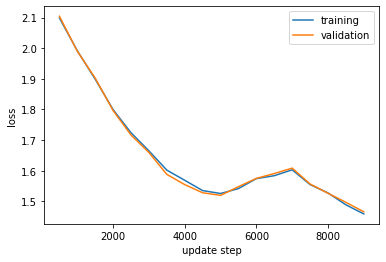

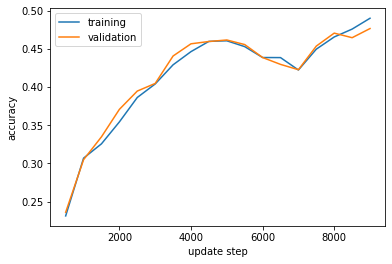

In [69]:
steps = 2 * ns * k
train_validation_error(*dropout_loss, label='loss', steps=steps)
train_validation_error(*dropout_accuracy, label='accuracy', steps=steps)

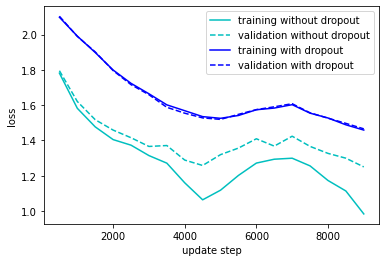

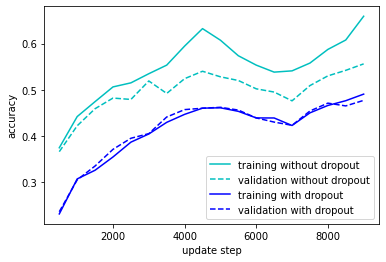

In [70]:
steps = 2 * ns * k
compare_batch_plot(*loss, *dropout_loss, label='loss', steps=steps, comparing_label='dropout')
compare_batch_plot(*accuracy, *dropout_accuracy, label='accuracy', steps=steps, comparing_label='dropout')

In [71]:
layers = [200, 100,  60, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dropout(0.5))
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(BatchNormalization(layers[i]))
    classifier.add(ReLU())
    
classifier.add(Dropout(0.5))
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

dropout_loss, dropout_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=3*k, reg_lambda=lambda_)
classifier.accuracy(X_test, Y_test)

100%|██████████| 55/55 [22:58<00:00, 25.06s/it]


0.497

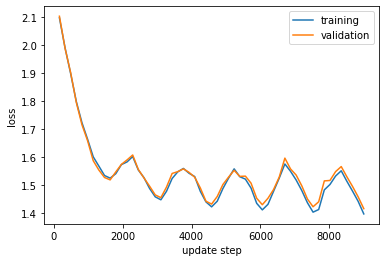

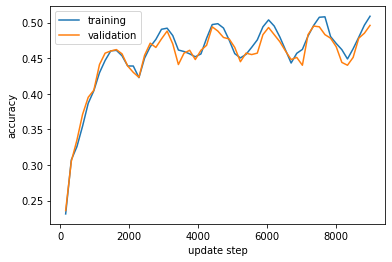

In [72]:
steps = 2 * ns * k
train_validation_error(*dropout_loss, label='loss', steps=steps)
train_validation_error(*dropout_accuracy, label='accuracy', steps=steps)

### Data augmentation

##### Best network

In [73]:
layers = [100,  50,  30, 10]

classifier = Model()

for i in range(len(layers) - 1):
    classifier.add(Dense(layers[i - 1] if i > 0 else X_train.shape[0], layers[i]))
    classifier.add(BatchNormalization(layers[i]))
    classifier.add(ReLU())
    
classifier.add(Dense(layers[-2], layers[-1]))
classifier.add(Softmax())

In [74]:
classifier.initialize_weights()
bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_,
                                      random_jitter=True)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [04:49<00:00, 16.09s/it]


0.5356

In [75]:
classifier.initialize_weights()
bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_,
                                      random_flip=True)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [05:06<00:00, 17.04s/it]


0.5539

In [76]:
classifier.initialize_weights()
bn_loss, bn_accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_,
                                      random_jitter=True, random_flip=True)
classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [07:17<00:00, 24.29s/it]


0.5536